# Tensor contractions

In [ ]:
import numpy as np

In [ ]:
import sys
sys.path.append("../../")
import tensornetworks as tn

## 1. Execute Tensor Contraction ABC

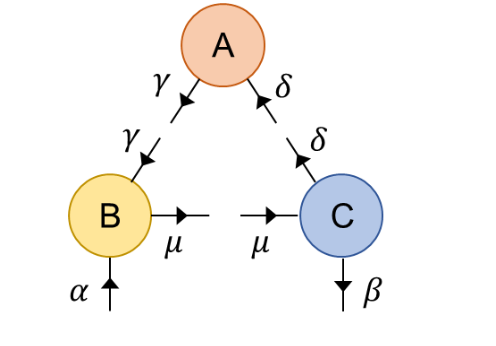

### 1.1 Define Tensors

In [ ]:
# leg dimensions
d_alpha = 101  # d_alpha
d_beta = 102  # d_beta
d_gamma = 103  # d_gamma
d_delta = 104  # d_delta
d_mu = 105  # d_mu

In [ ]:
A = np.random.rand(d_gamma, d_delta)
B = np.random.rand(d_alpha, d_mu, d_gamma)
C = np.random.rand(d_beta, d_mu, d_delta)

### 1.2. Contract B and C

In [ ]:
BC = tn.contract_indices(B, C, [1], [1])

In [ ]:
BC.shape

### 1.3. Contract BC and A

In [ ]:
ABC = tn.contract_indices(A, BC, [0, 1], [1, 3])

In [ ]:
ABC.shape

### 1.4 All

In [ ]:
%%time
BC = tn.contract_indices(B, C, [1], [1])
ABC = tn.contract_indices(A, BC, [0, 1], [1, 3])

## 2 Change Order Contraction

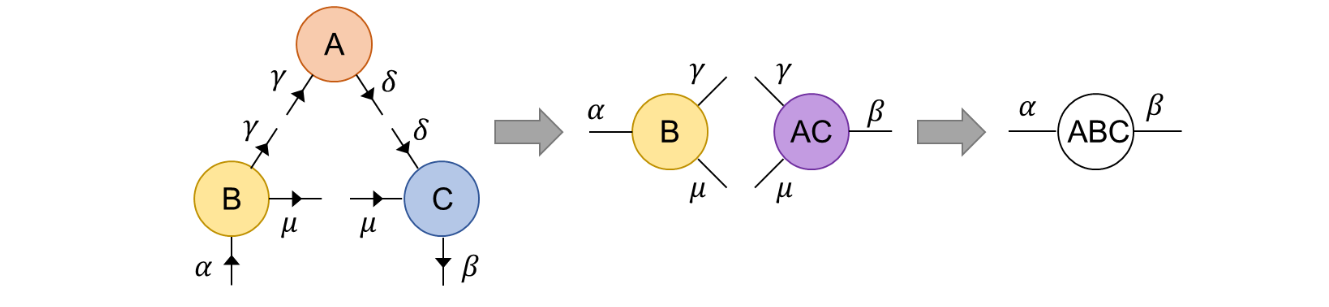

In [ ]:
AC = tn.contract_indices(A, C, [1], [2])
print(AC.shape)
print(B.shape)

In [ ]:
%%time
AC = tn.contract_indices(A, C, [1], [2])
BAC = tn.contract_indices(B, AC, [1, 2], [2, 0])

In [ ]:
np.isclose(ABC, BAC).all()

**BE AWARE** Contraction indices order is important!!!! It is  not the same:

**BAC = contract_indices(B, AC, [1, 2], [2, 0])**

than

**BAC = contract_indices(B, AC, [1, 2], [0, 2])**

In [ ]:
BAC2 = tn.contract_indices(B, AC, [1, 2], [0, 2])

In [ ]:
np.isclose(ABC, BAC2).all()